## First benchmark

To benchmark: estimating disassembly indexes for increasing levels of complex peptidomes


        

In [1]:
from disassembly.simulate_proteolysis import enzyme_set, enzyme, amino_acids



kr = enzyme_set(
    [
        enzyme({"K":1}, "K protease"),
    ],
    [1],
    [1],
)


viat = enzyme_set(
    [
        enzyme({"V": 0.35, "I": 0.25, "A": 0.2, "T": 0.1}, "V+I+A+T protease"),
    ],
    [1],
    [1],
)

random = enzyme_set(
    [enzyme({aa: 1 / len(amino_acids) for aa in amino_acids.values()}, "random")],
    [1],
    [1],
)
protein = "MKAAVLTLAVLFLTGSQARHFWQQDEPPQSPWDRVKDLATVYVDVLKDSGRDYVSQFEGSALGKQLNLKLLDNWDSVTSTFSKLREQLGPVTQEFWDNLEKETEGLRQEMSKDLEEVKAKVQPYLDDFQKKWQEEMELYRQKVEPLRAELQEGARQKLHELQEKLSPLGEEMRDRARAHVDALRTHLAPYSDELRQRLAARLEALKENGGARLAEYHAKATEHLSTLSEKAKPALEDLRQGLLPVLESFKVSFLSALEEYTKKLNTQ"

In [2]:
from disassembly.benchmark import Benchmark

n_iterations = 10
bmrk = Benchmark()

enzyme_sets = [kr, viat, random]
enzyme_names = ["K", "V+I+A+T", "random"]

bmrk.simulate_degradation(
    protein,
    enzyme_sets=enzyme_sets,
    enzyme_names=enzyme_names,
    n_generate=100,
    endo_or_exo_probability=[0.9,0.1],
    iterations=n_iterations,
)

Running K, 0
 42 / 100 (48)

/Users/erikhartman/dev/disassembly/src/disassembly/simulate_proteolysis.py:227: RuntimeWarning: invalid value encountered in scalar divide
  p / sum(index_to_cut.values()) for p in index_to_cut.values()


 99 / 100 (114)
52 unique peptides. 103 total

 Averaged DI: 1.48
Running K, 1
 99 / 100 (118)
57 unique peptides. 103 total

 Averaged DI: 1.47
Running K, 2
 99 / 100 (111)
53 unique peptides. 103 total

 Averaged DI: 1.40
Running K, 3
 99 / 100 (119)
56 unique peptides. 103 total

 Averaged DI: 1.38
Running K, 4
 99 / 100 (112)
57 unique peptides. 103 total

 Averaged DI: 1.50
Running K, 5
 99 / 100 (115)
58 unique peptides. 103 total

 Averaged DI: 1.53
Running K, 6
 99 / 100 (111)
54 unique peptides. 103 total

 Averaged DI: 1.43
Running K, 7
 99 / 100 (120)
59 unique peptides. 103 total

 Averaged DI: 1.49
Running K, 8
 99 / 100 (116)
50 unique peptides. 103 total

 Averaged DI: 1.33
Running K, 9
 99 / 100 (108)
58 unique peptides. 103 total

 Averaged DI: 1.46
Running V+I+A+T, 0
 99 / 100 (114)
80 unique peptides. 103 total

 Averaged DI: 1.53
Running V+I+A+T, 1
 99 / 100 (109)
76 unique peptides. 103 total

 Averaged DI: 1.56
Running V+I+A+T, 2
 99 / 100 (108)
80 unique peptides

<Axes: xlabel='d', ylabel='Density'>

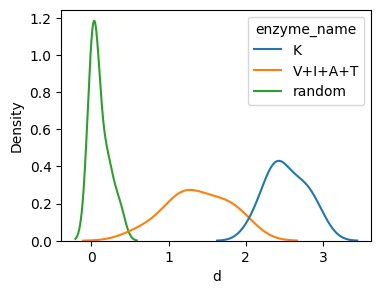

In [3]:
dct = {"enzyme_name":[],"iteration":[],"d":[]}

for enzyme_name in bmrk.enzyme_names:
    for iteration in range(bmrk.iterations):
        dct["enzyme_name"].append(enzyme_name)
        dct["iteration"].append(iteration)
        dct["d"].append(bmrk.results["real"][enzyme_name][iteration]["d"])

import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

dct_df = pd.DataFrame(dct)
plt.figure(figsize=(4,3))
sns.kdeplot(pd.DataFrame(dct), x="d", hue="enzyme_name")

<Axes: xlabel='di', ylabel='count'>

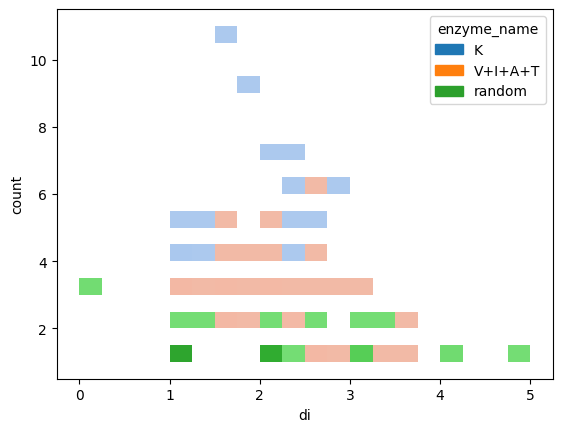

In [4]:
dct = {"peptide":[], "di":[], "count":[] ,"enzyme_name":[]}

for enzyme_name in bmrk.enzyme_names:
    for iteration in range(bmrk.iterations):
        counts = bmrk.simulated_peptidomes[enzyme_name][iteration]
        di = bmrk.results["real"][enzyme_name][iteration]["di"]
        for sequence in counts.keys():
            dct["peptide"].append(sequence)
            dct["di"].append(di[sequence])
            dct["count"].append(counts[sequence])
            dct["enzyme_name"].append(enzyme_name)

dct_df = pd.DataFrame(dct)
sns.histplot(dct_df, x="di", y="count", hue="enzyme_name", bins=20)

--K---
 97 / 500 | 0.00, mean: 0.00 | Plateau | nz: 243228

/Users/erikhartman/dev/disassembly/.venv/lib/python3.9/site-packages/numpy/core/fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/Users/erikhartman/dev/disassembly/.venv/lib/python3.9/site-packages/numpy/core/_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
/Users/erikhartman/dev/disassembly/.venv/lib/python3.9/site-packages/numpy/core/_methods.py:206: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/Users/erikhartman/dev/disassembly/.venv/lib/python3.9/site-packages/numpy/core/_methods.py:163: RuntimeWarning: invalid value encountered in divide
  arrmean = um.true_divide(arrmean, div, out=arrmean,
/Users/erikhartman/dev/disassembly/.venv/lib/python3.9/site-packages/numpy/core/_methods.py:198: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


 99 / 500 | 0.00, mean: 0.00 | Plateau | nz: 243
Learning rate decreased to 0.5
 100 / 500 | 0.00, mean: 0.00 | Plateau | nz: 243
 Averaged DI: 2.34
 99 / 500 | 0.00, mean: 0.00 | Plateau | nz: 274253
Learning rate decreased to 0.5
 102 / 500 | 0.00, mean: 0.00 | Plateau | nz: 274
 Averaged DI: 2.49
 99 / 500 | 0.00, mean: 0.00 | Plateau | nz: 253232
Learning rate decreased to 0.5
 101 / 500 | 0.00, mean: 0.00 | Plateau | nz: 253
 Averaged DI: 2.29
 99 / 500 | 0.00, mean: 0.00 | Plateau | nz: 254237
Learning rate decreased to 0.5
 100 / 500 | 0.00, mean: 0.00 | Plateau | nz: 254
 Averaged DI: 2.22
 99 / 500 | 0.00, mean: 0.00 | Plateau | nz: 281265
Learning rate decreased to 0.5
 103 / 500 | 0.00, mean: 0.00 | Plateau | nz: 281
 Averaged DI: 2.65
 99 / 500 | 0.00, mean: 0.00 | Plateau | nz: 277256
Learning rate decreased to 0.5
 102 / 500 | 0.00, mean: 0.00 | Plateau | nz: 277
 Averaged DI: 2.42
 99 / 500 | 0.00, mean: 0.00 | Plateau | nz: 229222
Learning rate decreased to 0.5
 103 / 5

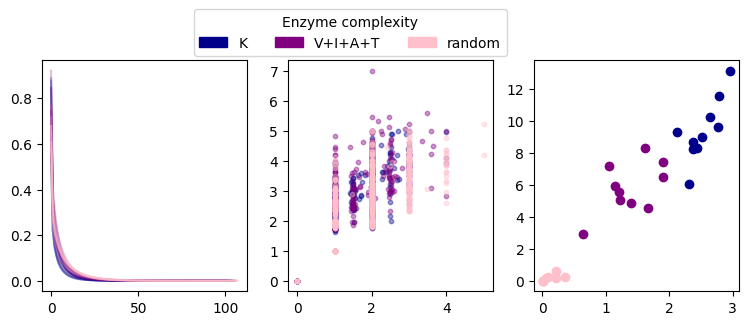

In [5]:
import matplotlib.pyplot as plt

fig, axs = plt.subplots(1, 3, figsize=(9,3))

bmrk.estimate_weights(method="alg", n_iterations=500, lr=1)

bmrk.plot(axs[0], ptype="loss", method_name="alg")
bmrk.plot(axs[1], ptype="corr_di", method_name="alg")
bmrk.plot(axs[2], ptype="d", method_name="alg")

--K---
 499 / 500 | 0.02, kl: 0.02, reg: 0.00  | nz: 215 | 
 Averaged DI: 2.08
 499 / 500 | 0.24, kl: 0.24, reg: 0.00  | nz: 222 | 
 Averaged DI: 2.29
 499 / 500 | 0.21, kl: 0.21, reg: 0.00  | nz: 207 | 
 Averaged DI: 2.12
 482 / 500 | 0.01, kl: 0.01, reg: 0.00  | nz: 225 | 
 Averaged DI: 2.05
 499 / 500 | 0.76, kl: 0.76, reg: 0.00  | nz: 284 | 
 Averaged DI: 2.44
 499 / 500 | 0.27, kl: 0.27, reg: 0.00  | nz: 233 | 
 Averaged DI: 2.27
 499 / 500 | 0.14, kl: 0.14, reg: 0.00  | nz: 196 | 
 Averaged DI: 2.00
 405 / 500 | 0.01, kl: 0.01, reg: 0.00  | nz: 296 | 
 Averaged DI: 2.14
 499 / 500 | 0.05, kl: 0.05, reg: 0.00  | nz: 162 | 
 Averaged DI: 2.08
 499 / 500 | 0.23, kl: 0.23, reg: 0.00  | nz: 247 | 
 Averaged DI: 2.15
--V+I+A+T---
 499 / 500 | 0.59, kl: 0.59, reg: 0.00  | nz: 400 | 
 Averaged DI: 2.21
 499 / 500 | 0.78, kl: 0.78, reg: 0.00  | nz: 344 | 
 Averaged DI: 2.14
 499 / 500 | 0.35, kl: 0.35, reg: 0.00  | nz: 363 | 
 Averaged DI: 2.24
 499 / 500 | 0.44, kl: 0.44, reg: 0.00  | nz

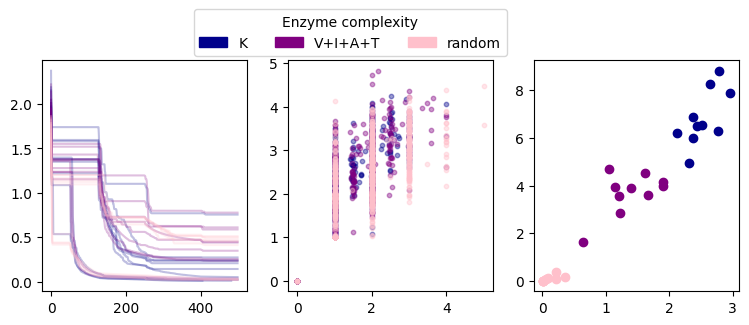

In [6]:
lr_scheduler = {}
steps = [50, 125, 250, 400, 500]
lrs = [1, 0.1, 0.01, 0.001, 0.0001]
for lr, step in zip(lrs, steps):
    for i in range(step):
        if i not in lr_scheduler:
            lr_scheduler[i] = lr

bmrk.estimate_weights(method="gd", lr_scheduler=lr_scheduler, n_iterations=500)

fig, axs = plt.subplots(1, 3, figsize=(9,3))

bmrk.plot(ax=axs[0], ptype="loss", method_name="gd")
bmrk.plot(ax=axs[1], ptype="corr_di", method_name="gd")
bmrk.plot(ax=axs[2], ptype="d", method_name="gd")

--K---
 499 / 500 | 1.98, kl: 0.09, reg: 1.89  | nz: 176 | 
 Averaged DI: 2.01
 499 / 500 | 2.16, kl: 0.16, reg: 2.00  | nz: 209 | 
 Averaged DI: 2.19
 499 / 500 | 2.15, kl: 0.10, reg: 2.05  | nz: 196 | 
 Averaged DI: 2.05
 499 / 500 | 1.12, kl: 0.00, reg: 1.12  | nz: 228 | 
 Averaged DI: 1.90
 499 / 500 | 4.40, kl: 1.05, reg: 3.35  | nz: 284 | 
 Averaged DI: 2.37
 499 / 500 | 2.37, kl: 0.14, reg: 2.23  | nz: 206 | 
 Averaged DI: 2.11
 499 / 500 | 2.06, kl: 0.08, reg: 1.98  | nz: 169 | 
 Averaged DI: 2.00
 499 / 500 | 1.59, kl: 0.00, reg: 1.59  | nz: 294 | 
 Averaged DI: 2.14
 499 / 500 | 1.95, kl: 0.06, reg: 1.90  | nz: 168 | 
 Averaged DI: 2.11
 499 / 500 | 1.24, kl: 0.00, reg: 1.24  | nz: 264 | 
 Averaged DI: 2.05
--V+I+A+T---
 499 / 500 | 5.64, kl: 0.92, reg: 4.72  | nz: 395 | 
 Averaged DI: 2.20
 499 / 500 | 1.83, kl: 0.01, reg: 1.82  | nz: 344 | 
 Averaged DI: 2.11
 499 / 500 | 1.06, kl: 0.00, reg: 1.06  | nz: 379 | 
 Averaged DI: 1.93
 499 / 500 | 4.30, kl: 0.34, reg: 3.96  | nz

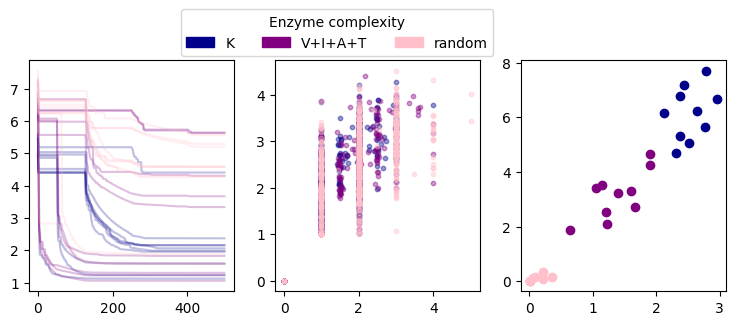

In [7]:
bmrk.estimate_weights(method="gd", lam1=0.1, lr_scheduler=lr_scheduler, n_iterations=500, method_name="gd_l1")

fig, axs = plt.subplots(1, 3, figsize=(9,3))

bmrk.plot(ax=axs[0], ptype="loss", method_name="gd_l1")
bmrk.plot(ax=axs[1], ptype="corr_di", method_name="gd_l1")
bmrk.plot(ax=axs[2], ptype="d", method_name="gd_l1")

--K---
 499 / 500 | 0.33, kl: 0.00, reg: 0.33  | nz: 221 | 
 Averaged DI: 2.01
 499 / 500 | 0.31, kl: 0.01, reg: 0.30  | nz: 237 | 
 Averaged DI: 2.25
 499 / 500 | 0.31, kl: 0.01, reg: 0.31  | nz: 224 | 
 Averaged DI: 2.13
 499 / 500 | 0.82, kl: 0.08, reg: 0.74  | nz: 199 | 
 Averaged DI: 2.04
 499 / 500 | 2.14, kl: 1.02, reg: 1.11  | nz: 276 | 
 Averaged DI: 2.36
 499 / 500 | 0.96, kl: 0.18, reg: 0.78  | nz: 213 | 
 Averaged DI: 2.17
 499 / 500 | 0.66, kl: 0.08, reg: 0.58  | nz: 180 | 
 Averaged DI: 1.95
 499 / 500 | 0.84, kl: 0.09, reg: 0.75  | nz: 248 | 
 Averaged DI: 2.14
 499 / 500 | 0.59, kl: 0.04, reg: 0.55  | nz: 167 | 
 Averaged DI: 2.12
 499 / 500 | 0.40, kl: 0.04, reg: 0.36  | nz: 249 | 
 Averaged DI: 2.13
--V+I+A+T---
 499 / 500 | 0.41, kl: 0.01, reg: 0.40  | nz: 411 | 
 Averaged DI: 2.14
 499 / 500 | 1.58, kl: 0.34, reg: 1.24  | nz: 338 | 
 Averaged DI: 2.16
 499 / 500 | 0.21, kl: 0.00, reg: 0.21  | nz: 379 | 
 Averaged DI: 2.17
 499 / 500 | 1.63, kl: 0.29, reg: 1.34  | nz

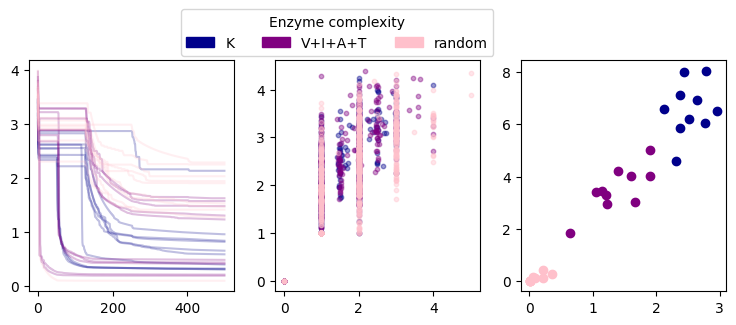

In [8]:
bmrk.estimate_weights(method="gd", lam2=0.1, lr_scheduler=lr_scheduler, n_iterations=500, method_name="gd_l2")

fig, axs = plt.subplots(1, 3, figsize=(9,3))

bmrk.plot(ax=axs[0], ptype="loss", method_name="gd_l2")
bmrk.plot(ax=axs[1], ptype="corr_di", method_name="gd_l2")
bmrk.plot(ax=axs[2], ptype="d", method_name="gd_l2")

--K---


/Users/erikhartman/dev/disassembly/src/disassembly/simulate_proteolysis.py:227: RuntimeWarning: invalid value encountered in scalar divide
  p / sum(index_to_cut.values()) for p in index_to_cut.values()


Iteration: 0
	V: 27.92 | 27.92
	I: 27.07 | 27.92
I better!
	I: 27.91 | 27.07
	L: 27.94 | 27.07
	E: 27.94 | 27.07
	Q: 27.98 | 27.07
	D: 27.98 | 27.07
	N: 27.89 | 27.07
	H: 27.22 | 27.07
	W: 27.61 | 27.07
	F: 27.89 | 27.07
	Y: 27.92 | 27.07
	R: 27.96 | 27.07
	K: 27.69 | 27.07
	S: 27.96 | 27.07
	T: 27.89 | 27.07
	M: 27.91 | 27.07
	A: 27.22 | 27.07
	G: 27.98 | 27.07
	P: 27.55 | 27.07
	C: 27.43 | 27.07
 exo: 26.79 | 26.79 (0.25)
 exo: 27.91 | 26.79 (0.25)
 exo: 27.67 | 26.79 (0.25)
 exo: 27.95 | 26.79 (0.25)
 exo: 27.89 | 26.79 (0.25)
 exo: 27.89 | 26.79 (0.25)
 exo: 26.82 | 26.79 (0.25)
 exo: 27.95 | 26.79 (0.25)
 exo: 27.97 | 26.79 (0.25)
 exo: 27.66 | 26.79 (0.25)
 249 / 250 | 0.19, kl: 0.19, reg: 0.00  | nz: 222 | 
 Averaged DI: 2.30
Iteration: 0
	V: 27.84 | 26.96
	I: 27.30 | 26.96
	L: 27.36 | 26.96
	E: 27.59 | 26.96
	Q: 27.81 | 26.96
	D: 27.87 | 26.96
	N: 27.84 | 26.96
	H: 26.77 | 26.96
H better!
	H: 27.87 | 26.77
	W: 27.85 | 26.77
	F: 27.17 | 26.77
	Y: 27.41 | 26.77
	R: 27.92 | 26.77


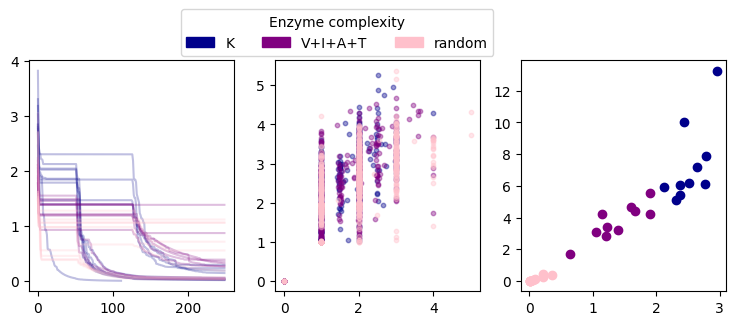

In [9]:
bmrk.estimate_weights(
   method="gd",
    lr_scheduler=lr_scheduler, n_iterations=250,
    lam1=0,
    lam2=0,
    parameter_estimator=True,
    method_name="gd_param",
 )

fig, axs = plt.subplots(1, 3, figsize=(9,3))

bmrk.plot(ax=axs[0], ptype="loss", method_name="gd_param")
bmrk.plot(ax=axs[1], ptype="corr_di", method_name="gd_param")
bmrk.plot(ax=axs[2], ptype="d", method_name="gd_param")

<Axes: xlabel='enzyme', ylabel='error'>

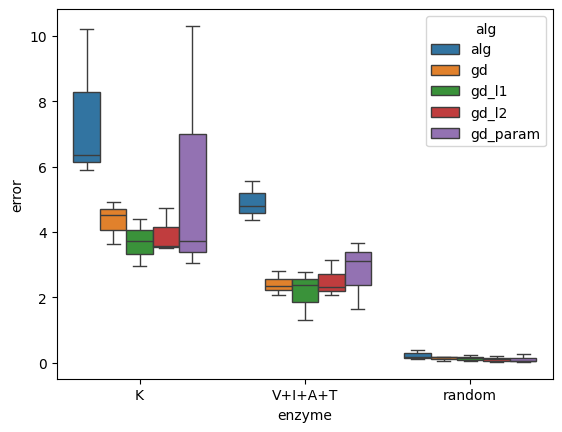

In [10]:
import pandas as pd
import numpy as np

df = {"alg": [], "enzyme": [], "error": []}
for alg in bmrk.results.keys():
    if alg == "real":
        continue
    for enzyme_name in enzyme_names:

        for iteration in range(3):
            df["alg"].append(alg)
            df["enzyme"].append(enzyme_name)
            df["error"].append(
                np.abs(
                    bmrk.results["real"][enzyme_name][iteration]["d"]
                    - bmrk.results[alg][enzyme_name][iteration]["d"]
                )
            )
df = pd.DataFrame(df)
import seaborn as sns

sns.boxplot(df, x="enzyme", y="error", hue="alg")

# Peptidomes

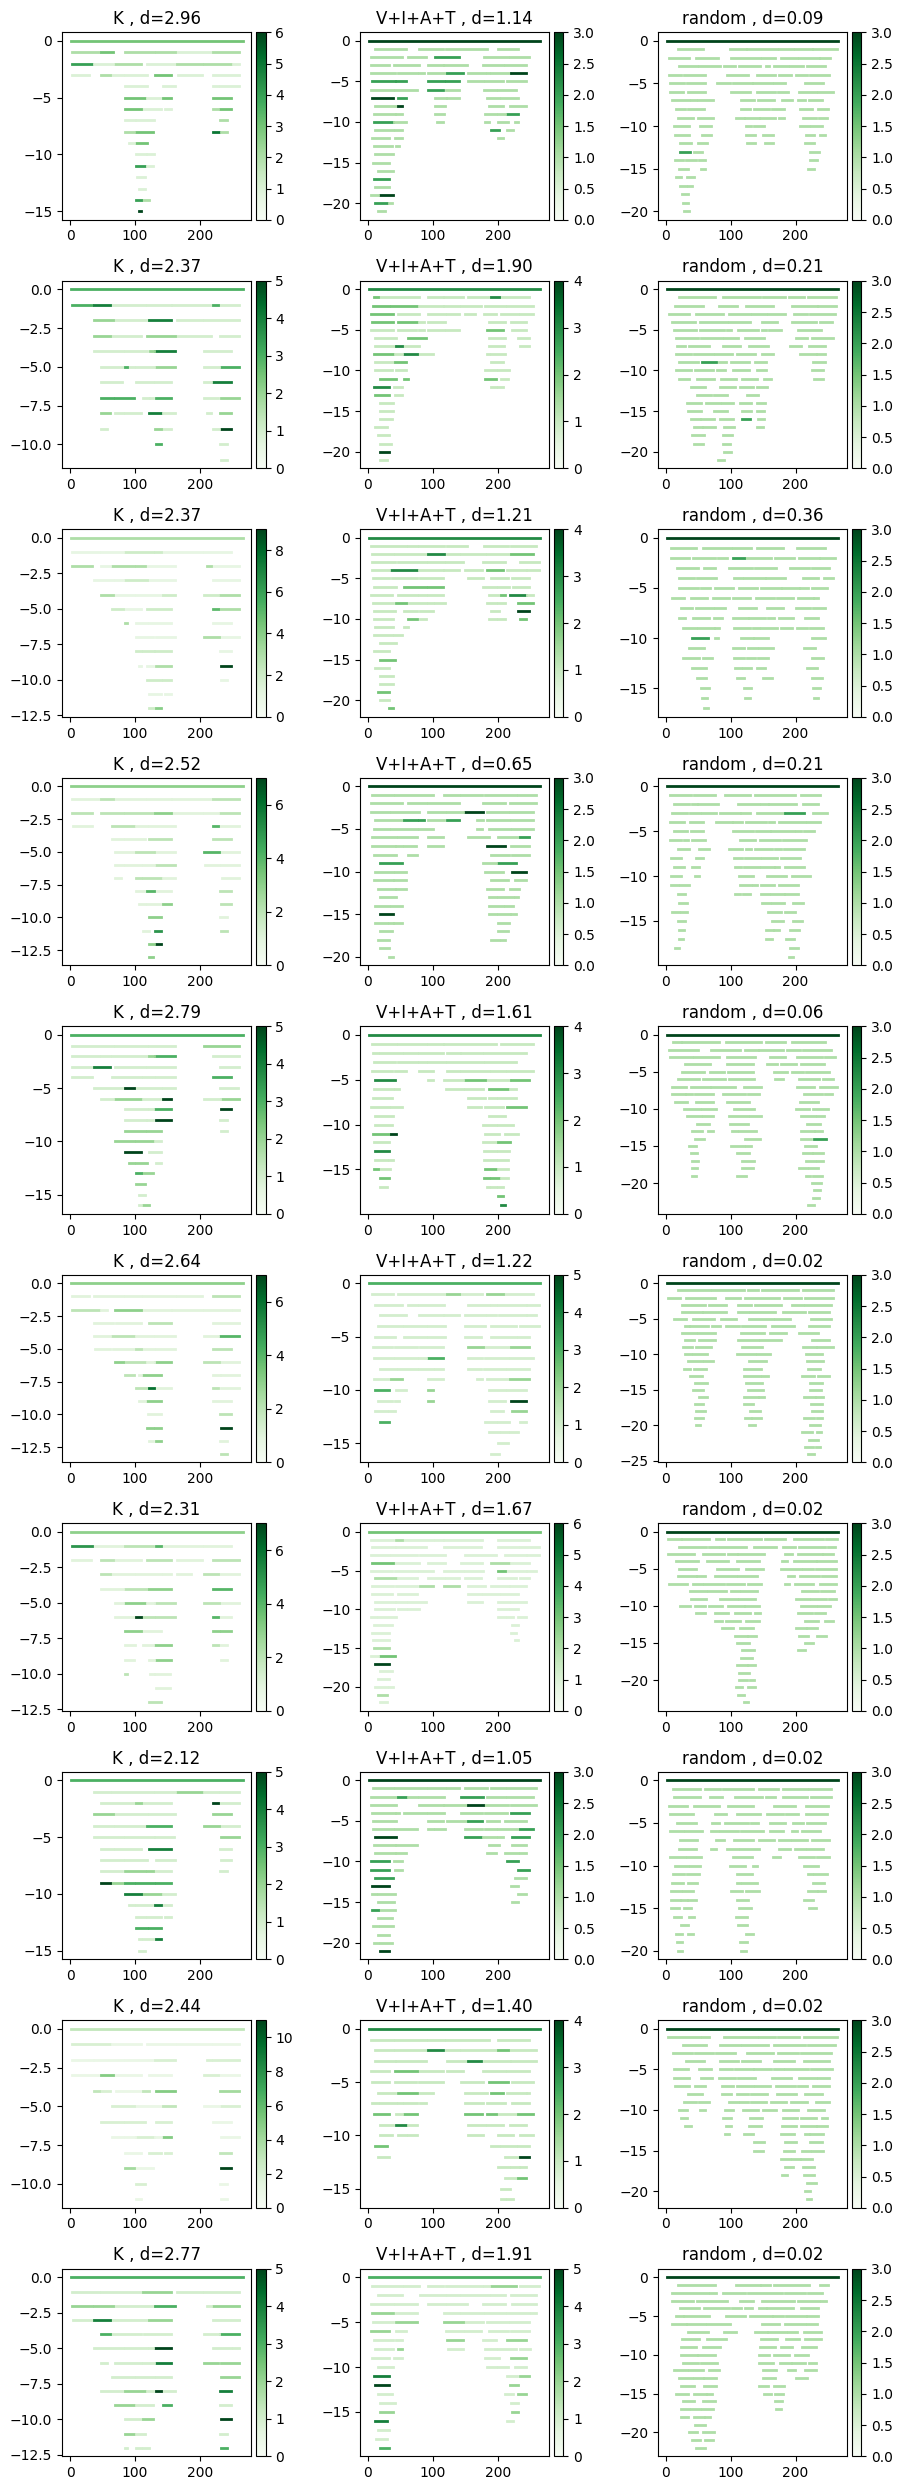

In [21]:
from disassembly.util import plot_peptidome

fig, axs = plt.subplots(
    bmrk.iterations,
    len(bmrk.enzyme_names),
    figsize=(len(bmrk.enzyme_names) * 3, bmrk.iterations * 2.5),
)
for iteration in range(bmrk.iterations):
    for test_name in bmrk.enzyme_names:
        ax = axs[iteration, bmrk.enzyme_names.index(test_name)]
        ax.set_title(f"{test_name} , d={bmrk.results['real'][test_name][iteration]['d']:.2f}")
        plot_peptidome(protein, bmrk.simulated_peptidomes[test_name][iteration], ax)
plt.tight_layout()